The **Edit-Distance** or called **Levenshtein Distance** is frequently used algorithm to judge how simliar 2 strings are, it widely used in DNA-sequential data match, Natural Language Process, and Speech Recognition. 

***

I am interesting in Edit-Distance because I am trying to implement the [CTC-loss](http://www.cs.toronto.edu/~graves/icml_2006.pdf) during my leisure time currently. 

In the paper, the **Label-Error-Rate** is the core measurement of the CTC-task and  **Label Error Rate** is using [Edit Distance Algorithm](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.19.7158&rep=rep1&type=pdf) or called Levenshtein Distance.

$ LER(h,S') = \frac{1}{Z} \sum_{(x,z) \in S'} ED(h(x)) $

***


#### Algorithm : 
The ED algorithms is shown as below, ref from [standford slides](https://web.stanford.edu/class/cs124/lec/med.pdf)

Where, 

- $\text{X, Y }$ are sequential data, with length of N and M
- $\text{D(i,j) : } $ as the number of edit times between 2 clipped sequences $ X[1,...,i] , Y[1,...,j]$ 
- Use the DP method, that we first comparison sub-sequence of X[1], and Y[1]
- In following figure, we difine the edit-numbers of substitution is 2, in our code implementation, we will have it as 1.


<img src='image/Glance-03-EditDistance-01.png' />
</br>
***

#### Code Implementation :

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

def ED(x, y, plot_func=None):
    assert len(x)>0 ; assert len(y)>0
    # ED table, where is the memo, memory-matrix, attention-memory ... etc 
    # lots of similar idea
    # here we treat the cost of substitution == 1 
    # we could also it as 2 in alternative
    # Actually, we can make lots of tricks here lol...
    
    # init
    memo = np.zeros((len(x)+1,len(y)+1))
    for i in range(1, len(x)+1):
        memo[i][0] = i
    for j in range(1, len(y)+1):
        memo[0][j] = j
    
    # DP 
    for i in range(1,len(x)+1):
        for j in range(1,len(y)+1):
            if x[i-1]==y[j-1]:
                memo[i][j]=min( memo[i-1][j]+1, memo[i][j-1]+1, memo[i-1][j-1]  )
            else:
                memo[i][j]=min( memo[i-1][j]+1, memo[i][j-1]+1, memo[i-1][j-1]+1  )
    if plot_func:
        plot_func(memo)
    return memo[len(x)][len(y)]


def plot_memo(memo):
    sns.set(style="white")
    ax = sns.heatmap(memo, linewidths=.5, annot=True)

#### Visulization : 

By visualization, we will see the memo in DP-algorithm.

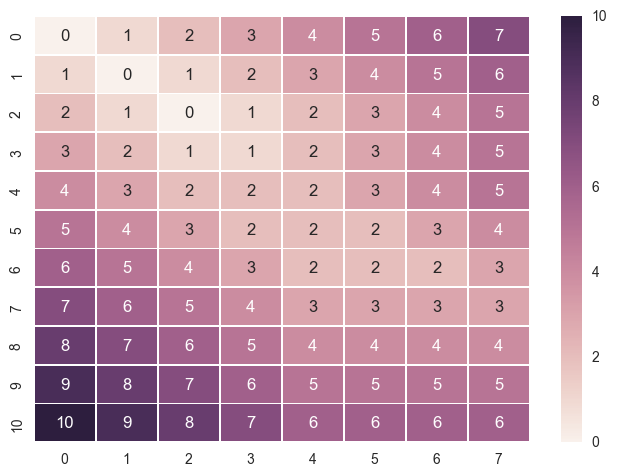

In [3]:
x = '1123112345'
y = '1111111'

# exec & plot 
edit_distance = ED(x,y, plot_memo)

# validate
import editdistance # this is another implementation 
assert int(editdistance.eval(x,y))==int(edit_distance)